<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu_8_2KNN_iris%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN ( K - Nearest Neighbor )알고리즘

  1 알고리즘 개요
    . KNN 알고리즘은 지도학습의 한 종류로,
      정답이 있는 데이터를 사용하여 분류 작업을 수행한다.
      . 서로 가까운 점들은 유사하다는 가정하에, 데이터로부터 거리가 가까운 K개의 다른 데이터의 정답(목표값)을 참조하여 분류

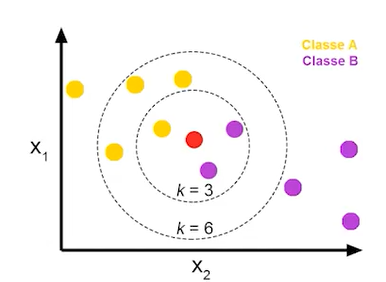

KNN 알고리즘은 지도 학습의 한 종류로, 정답이 있는 데이터를 사용하여 분류 작업을 한다.

서로 가까운 점들은 유사하다는 가정하에, 데이터로부터 거리가 가까운 K개의 다른 데이터의 정답을 참조하여 분류한다.


- KNN 알고리즘은** 변수별 단위**가 무엇이냐에 따라 거리가 달라지고, 분류 결과가 달라질 수 있음.
- 따라서 KNN 알고리즘을 적용할 때에는 사전에 **데이터를 표준화 하여야 한다.**



  꽃잎의 길이와 너비,

  꽃받침의 길이와 너비를 가지고

  품종을 구분한다. (목표)

K 값에 따라서 분류의 정확도가 달라지므로, 적절한 K값을 찾는 것이 매우 중요하다.

In [ ]:
##KNN을 이용한 붓꽃 분류



 분석 data를 준비 한 후 k 값을 3,,6,,9,,로 변경해 가면서 정확도를 비교해 보자.

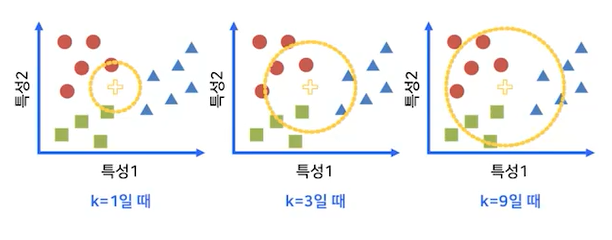

1. import

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# KNN model
from sklearn.neighbors import KNeighborsClassifier
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split


2. data 모으기

In [ ]:
# call data
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.info()  # missing value check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
### 4. data
## 독립 변수별 Min-Max 정규화 (0-1 사이의 값으로 변환)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [ ]:
## 5. 분석 data set
## X는 독립 변수, y는 종속 변수

5. data 분리

In [ ]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df[["species"]]


In [ ]:
# 분석 data  분할 (8:2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [ ]:
##6. 데이터 분석 수행
# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
##7. 성능 평가 및 시각화

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [ ]:
pred.shape

(30,)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)


0.9333333333333333


summarize

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 로딩
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-NN 모델 (k=3)
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


새로운 code 의 예

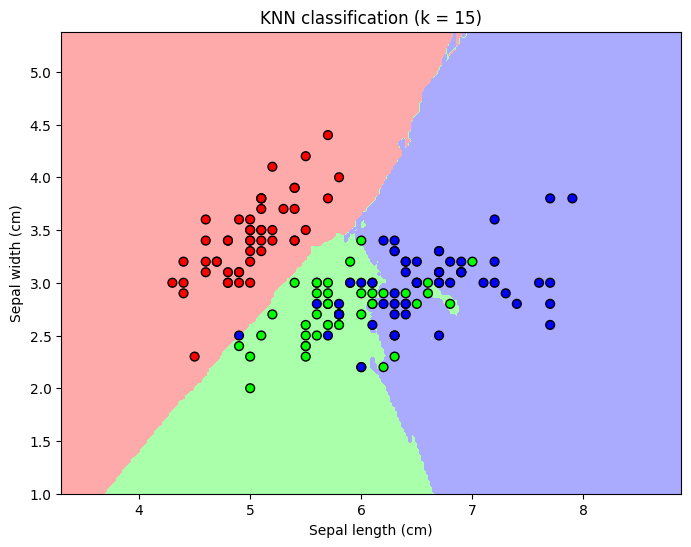

In [ ]:
# 필요한 라이브러리 설치
!pip install scikit-learn matplotlib --quiet

# 1. 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# 2. 데이터 로딩 (Iris 데이터셋)
iris = datasets.load_iris()
X = iris.data[:, :2]  # 2개의 feature만 사용: sepal length, sepal width
y = iris.target

# 3. KNN 설정
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# 4. 시각화를 위한 meshgrid 생성
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 5. 예측 수행
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. 색상 설정
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 7. 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
plt.title("KNN classification (k = %i)" % n_neighbors)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


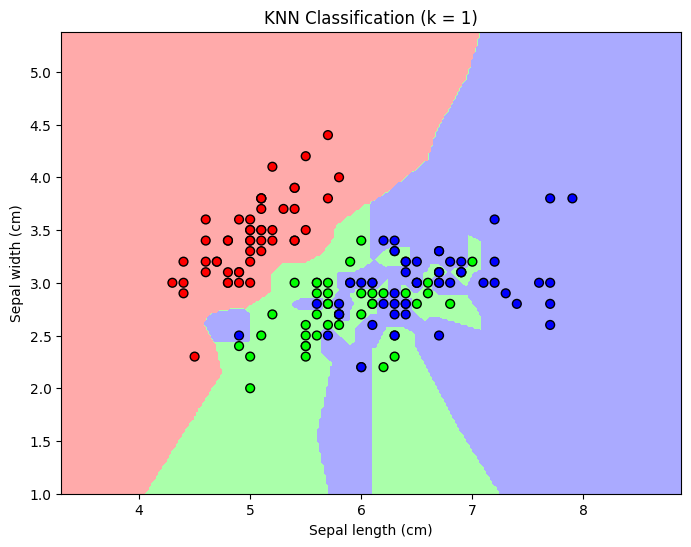

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 애니메이션용 figure
fig, ax = plt.subplots(figsize=(8, 6))

def animate(k):
    ax.clear()
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    ax.set_title(f"KNN Classification (k = {k})")
    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Sepal width (cm)")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# 애니메이션 생성
ani = FuncAnimation(fig, animate, frames=range(1, 21), interval=1000)
HTML(ani.to_jshtml())


| K값 (이웃 수) | 모델 특성                   |
| --------- | ----------------------- |
| K가 작을수록   | 결정 경계가 복잡하고 과적합 가능성이 높음 |
| K가 클수록    | 경계가 부드러워지고 일반화 성능 향상    |


이 애니메이션은 K값에 따른 결정 경계의 변화와 실제 붓꽃 데이터 포인트가 어떻게 분류되는지를 직관적으로 보여줍니다.

🔧 추가로, petal length와 petal width를 사용하는 버전이나, distance 기반 가중치(weights='distance')의 변화를 보고 싶으시면 말씀해 주세요.

원하시면 KNN의 분류 정확도 변화도 함께 시각화해 드릴 수 있습니다.

KNN 알고리즘에서 **이웃의 수 (k)**에 따라 **분류 정확도(accuracy)**가 어떻게 변하는지를 시각화하면, **과적합(Overfitting)**과 **과소적합(Underfitting)**의 개념을 이해하는 데 매우 도움이

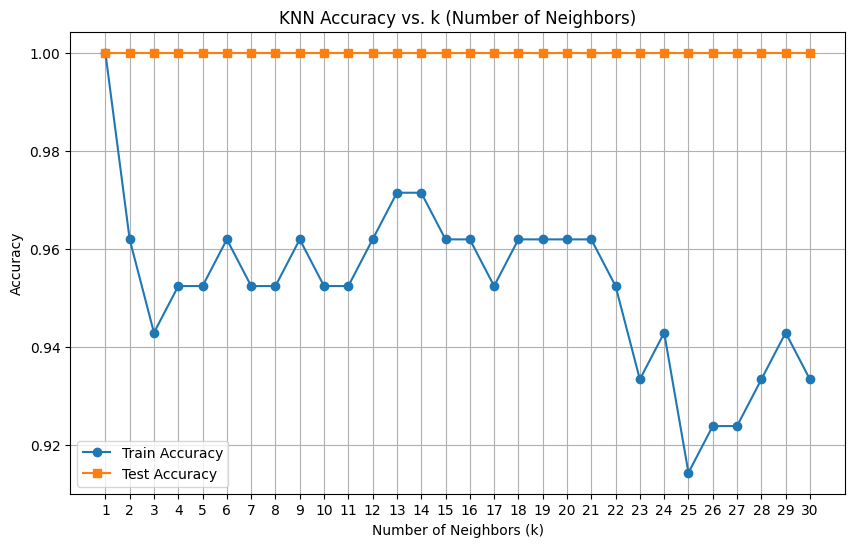

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 로딩
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 데이터 분할 (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 정확도 저장용 리스트
k_range = range(1, 31)
train_accuracies = []
test_accuracies = []

# K값 변화에 따른 정확도 측정
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 예측
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # 정확도 저장
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k (Number of Neighbors)')
plt.legend()
plt.grid(True)
plt.xticks(k_range)
plt.show()


Test Accuracy의 변화가 미세하고, Train Accuracy에 비해 변화 폭이 작기 때문에 시각적으로 평평하게 보일 수 있습니다.

| k 값            | 경향성                                        |
| -------------- | ------------------------------------------ |
| 작을수록 (k=1\~3)  | 훈련 정확도는 높으나 테스트 정확도는 낮을 수 있음 → 과적합 가능성     |
| 중간 (k=5\~10)   | 일반적으로 가장 좋은 Test Accuracy 도출               |
| 너무 클 경우 (k>20) | 모델이 너무 단순해져서 Test Accuracy 감소 가능 → 과소적합 경향 |


k= 1, Train Accuracy=1.0000, Test Accuracy=1.0000
k= 2, Train Accuracy=0.9619, Test Accuracy=1.0000
k= 3, Train Accuracy=0.9429, Test Accuracy=1.0000
k= 4, Train Accuracy=0.9524, Test Accuracy=1.0000
k= 5, Train Accuracy=0.9524, Test Accuracy=1.0000
k= 6, Train Accuracy=0.9619, Test Accuracy=1.0000
k= 7, Train Accuracy=0.9524, Test Accuracy=1.0000
k= 8, Train Accuracy=0.9524, Test Accuracy=1.0000
k= 9, Train Accuracy=0.9619, Test Accuracy=1.0000
k=10, Train Accuracy=0.9524, Test Accuracy=1.0000
k=11, Train Accuracy=0.9524, Test Accuracy=1.0000
k=12, Train Accuracy=0.9619, Test Accuracy=1.0000
k=13, Train Accuracy=0.9714, Test Accuracy=1.0000
k=14, Train Accuracy=0.9714, Test Accuracy=1.0000
k=15, Train Accuracy=0.9619, Test Accuracy=1.0000
k=16, Train Accuracy=0.9619, Test Accuracy=1.0000
k=17, Train Accuracy=0.9524, Test Accuracy=1.0000
k=18, Train Accuracy=0.9619, Test Accuracy=1.0000
k=19, Train Accuracy=0.9619, Test Accuracy=1.0000
k=20, Train Accuracy=0.9619, Test Accuracy=1.0000


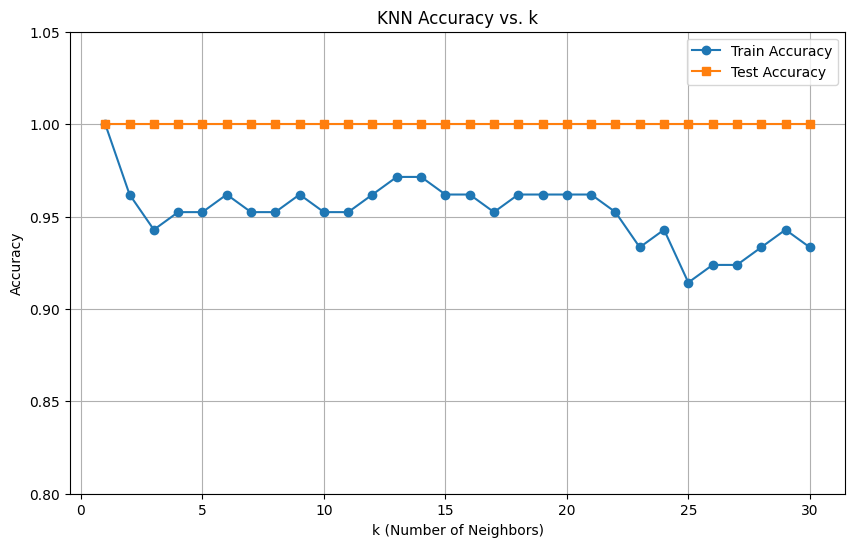

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_accuracies = []
test_accuracies = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"k={k:2d}, Train Accuracy={train_acc:.4f}, Test Accuracy={test_acc:.4f}")

# Plot with more visible difference
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.ylim(0.8, 1.05)  # Set y-axis limits to highlight differences
plt.grid(True)
plt.legend()
plt.show()


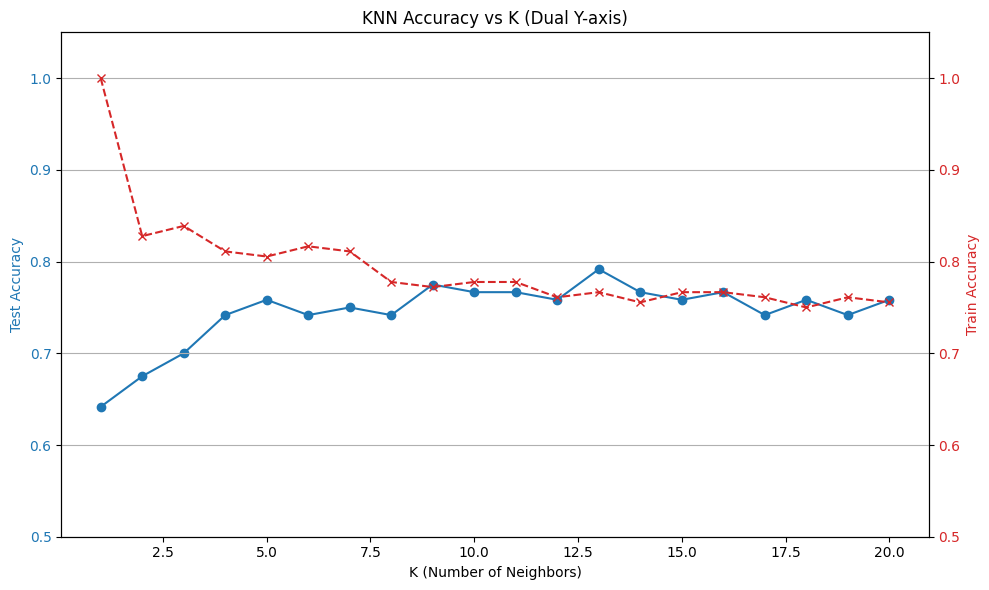

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. 샘플 데이터 생성
X, y = make_classification(n_samples=300, n_features=4, n_informative=2,
                           n_redundant=0, class_sep=0.5, flip_y=0.1,
                           random_state=42)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 3. 정확도 저장
k_values = range(1, 21)
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

# 4. 시각화 (twinx 사용 + 축 범위 설정)
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('K (Number of Neighbors)')
ax1.set_ylabel('Test Accuracy', color=color1)
ax1.plot(k_values, test_acc, color=color1, marker='o', label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0.5, 1.05)  # Test Accuracy 범위

# 보조 축
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Train Accuracy', color=color2)
ax2.plot(k_values, train_acc, color=color2, marker='x', linestyle='--', label='Train Accuracy')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0.5, 1.05)  # Train Accuracy 범위

plt.title('KNN Accuracy vs K (Dual Y-axis)')
fig.tight_layout()
plt.grid(True)
plt.show()


animation & insight

이 애니메이션으로 얻을 수 있는 Insight
k 값이 작을 때:

Train Accuracy가 매우 높으며, 때로는 1에 가까움.

이는 **과적합(overfitting)**의 위험이 있음을 시사합니다.

k 값이 증가할수록:

Train Accuracy는 점차 낮아지며, Test Accuracy는 더 안정적인 값을 보입니다.

이 구간에서 모델이 더 일반화되는 경향을 보여줍니다.

Test Accuracy의 변화 패턴:

일정 구간에서 급격한 하락 또는 상승이 있을 수 있으며, 이는 데이터의 분포 및 noise에 민감하게 반응하는 KNN의 특성을 보여줍니다.

이와 같은 시각화는 학생들에게 KNN의 k 선택이 얼마나 중요한지를 직관적으로 이해시키는 데 매우 효과적입니다.

Button(description='Run KNN Accuracy Animation', style=ButtonStyle())

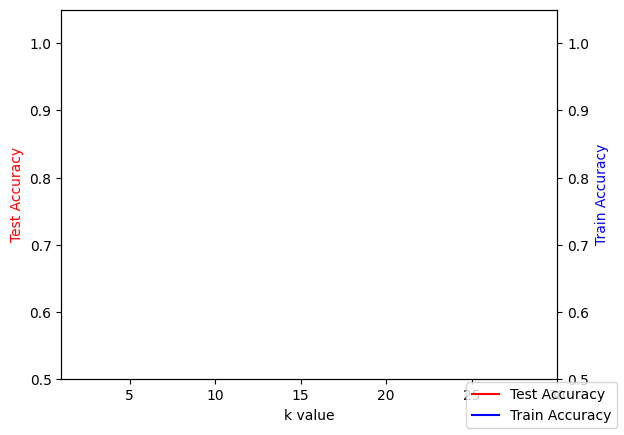

In [ ]:
# ✅ 필수 라이브러리 설치 (Colab에서 한 번만 실행)
!pip install -q scikit-learn matplotlib ipywidgets

# ✅ 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, Video

# ✅ 데이터 생성 및 전처리
X, y = make_classification(n_samples=300, n_features=4, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ✅ 애니메이션을 위한 설정
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

k_values = list(range(1, 31))
train_acc = []
test_acc = []

train_line, = ax2.plot([], [], 'b-', label='Train Accuracy')
test_line, = ax1.plot([], [], 'r-', label='Test Accuracy')

ax1.set_xlim(1, 30)
ax1.set_ylim(0.5, 1.05)
ax2.set_ylim(0.5, 1.05)

ax1.set_xlabel("k value")
ax1.set_ylabel("Test Accuracy", color='r')
ax2.set_ylabel("Train Accuracy", color='b')
fig.legend(loc="lower right")


# ✅ 업데이트 함수 정의
def update(frame):  # Rename 'k' to 'frame' for clarity
    k = k_values[frame]  # Access the correct k value from k_values using frame index
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    tr_acc = model.score(X_train, y_train)
    te_acc = model.score(X_test, y_test)

    train_acc.append(tr_acc)
    test_acc.append(te_acc)

    # Fix: Ensure x and y data have the same length for each frame
    x_data = k_values[:frame + 1]
    train_line.set_data(x_data, train_acc[:frame + 1])
    test_line.set_data(x_data, test_acc[:frame + 1])
    return train_line, test_line


# ✅ 애니메이션 실행 함수 정의
def animate_knn_accuracy(change):
    # Clear previous data to prevent accumulation
    global train_acc, test_acc
    train_acc = []
    test_acc = []

    # 애니메이션 생성
    ani = FuncAnimation(fig, update, frames=len(k_values), interval=400, blit=True)

    # 애니메이션 파일 저장
    ani.save("knn_accuracy_animation.mp4", writer="ffmpeg", fps=2)
    plt.close()  # 출력 중복 방지

    # 애니메이션 비디오 출력
    display(Video("knn_accuracy_animation.mp4", embed=True))

# ✅ 버튼 생성
button = widgets.Button(description="Run KNN Accuracy Animation")
button.on_click(animate_knn_accuracy)

# ✅ 버튼을 화면에 표시
display(button)

ㅍInsight
작은 k값: 모델이 training set에 과적합되어 Train Accuracy가 높고 Test Accuracy가 낮아질 수 있음.

중간 k값: 일반화 성능이 최적화되어 Test Accuracy가 가장 높을 수 있음.

큰 k값: 모델이 단순화되어 underfitting이 발생하고, 정확도가 낮아질 수 있음.

